In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from textwrap import wrap
from matplotlib.font_manager import FontProperties
import re
from scipy import stats
from matplotlib.lines import Line2D 

line_size=0.5
custom_params = {
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': 'black',
    'figure.facecolor': 'white',
    "axes.spines.right": True, 
    "axes.spines.bottom": True,
    'xtick.direction': 'inout',
    'ytick.direction': 'in',
    'xtick.bottom': True,
    'xtick.minor.visible': False,
    'xtick.major.bottom':  True,
    'xtick.minor.bottom':  True,
    'xtick.major.pad':     7,     # distance to major tick label in points#
    'xtick.minor.pad':     3.4,     # distance to the minor tick label in points#
    'xtick.major.size':    10,
    'ytick.major.size':    4,
    'xtick.major.width':   line_size,
    'ytick.major.width':   line_size,
    'axes.linewidth': line_size,
    'xtick.minor.size':    2,
    'pdf.fonttype': 42}

sns.set_theme(style="ticks", rc=custom_params, font="Arial",font_scale=0.7)

enmax_palette = ["#648FFF", "#FE6100", "#785EF0", "#DC267F", "#FFB000"]
sns.set_palette(palette=enmax_palette)


5.333333333333333


C:\Users\Carruthers\AppData\Local\Temp\ipykernel_35376\2828145469.py:31: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(legend_handles, ['_','_','Non-Target','Target'],loc='upper right')


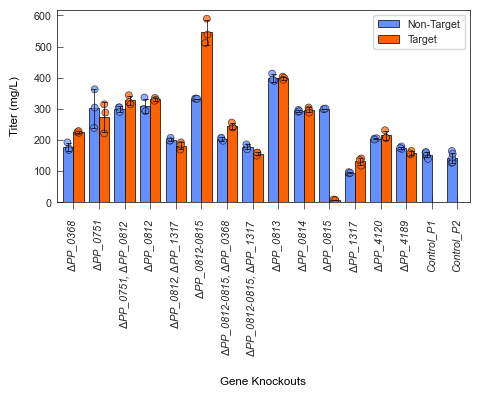

In [2]:
#Off-Target_R1
fig="Off-Target_R1"
df = pd.read_csv('Figure_Data\\KOs_Plate1_Plate2.csv')
df_sorted = df.sort_values(by='Strain', ascending=True)
df_sorted
data=df_sorted.copy()

sns.set_palette(palette=enmax_palette)

w=len(data)/18
print(w)
plt.figure(figsize=(w,2.5))

#plot stripplot overlaid on a barplot
with sns.color_palette():
    ax=sns.stripplot(
        data=data, x="Strain", 
        y="Titer", 
        hue="Target", 
        dodge=True, alpha=0.7, linewidth =line_size, edgecolor="0", zorder=2)

    ax=sns.barplot(
        data, x="Strain", y="Titer", hue="Target",
        errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=line_size,
        linewidth =line_size, edgecolor="0", ax=ax,saturation=1)
    legend_handles, labels = ax.get_legend_handles_labels()

#format axes and legend
plt.xlabel('Gene Knockouts', labelpad=15)
plt.ylabel('Titer (mg/L)', labelpad=10)
plt.legend(legend_handles, ['_','_','Non-Target','Target'],loc='upper right')

plt.ylim(0,)
plt.xticks(rotation='vertical',style='italic') 

ax.set_xlim(-0.65,None)

plt.savefig(f'Figure_Export\\{fig}.svg',dpi=1200, bbox_inches = 'tight')
plt.show()

6.0


C:\Users\Carruthers\AppData\Local\Temp\ipykernel_35376\1421039854.py:39: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(legend_handles,['_','_','Non-Target', 'Target'],bbox_to_anchor=(0.5, 1.05), loc='lower center', ncol=4)


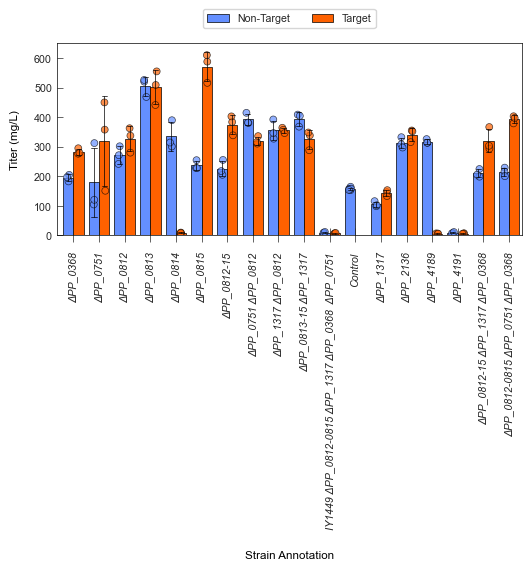

In [4]:
#Off-Target_R2
fig="Off-Target_R2"
df = pd.read_csv('Figure_Data\\241122_OT_Effects_Chk.csv')
data=df.copy()

#def add_newline(label, max_length=15):
#    if len(label) <= max_length:
#        return label  # No need to modify
#    split_index = label.find(" ", max_length)  # Find the next space after max_length
#    if split_index == -1:  # If no space is found, return as-is
#        return label
#    return label[:split_index] + "\n" + label[split_index + 1:]

# Apply the function to the 'Strain' column
#data["Strain2"] = data["Strain"].apply(add_newline)

sns.set_palette(palette=enmax_palette)

w=len(data)/18
print(w)
plt.figure(figsize=(w,2.5))

#plot stripplot overlaid on a barplot
with sns.color_palette():
    ax=sns.stripplot(
        data, x="Strain", 
        y="Titer", hue = "Type",
        dodge=True, alpha=0.7, linewidth =line_size, edgecolor="0", zorder=2)

    ax=sns.barplot(
        data, x="Strain", y="Titer", hue = "Type",
        errorbar="sd", zorder=0, capsize=0.2, errcolor="0", errwidth=line_size,
        linewidth =line_size, edgecolor="0", ax=ax,saturation=1)
    legend_handles, labels = ax.get_legend_handles_labels()

#format axes and legend
plt.xlabel('Strain Annotation', labelpad=15)
plt.ylabel('Titer (mg/L)', labelpad=10)
plt.legend(legend_handles,['_','_','Non-Target', 'Target'],bbox_to_anchor=(0.5, 1.05), loc='lower center', ncol=4)

plt.ylim(0,)
plt.xticks(rotation='vertical',style='italic')

ax.set_xlim(-0.65,None)

plt.savefig(f'Figure_Export\\{fig}.svg',dpi=1200, bbox_inches = 'tight')
plt.show()